In [55]:
import cv2,os

data_route=r'C:\Users\Aniruddh Srivatsa\Downloads\datum'
cats=os.listdir(data_route)
labels=[i for i in range(len(cats))]

label_dict=dict(zip(cats,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [56]:
CATEGORIES = ['without_mask','with_mask']

In [57]:
data = []
IMG_SIZE=120
for category in CATEGORIES:
    path = os.path.join(data_route, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (IMG_SIZE,IMG_SIZE))
        data.append([new_arr, label])

In [58]:
data[:2]

[[array([[248, 248, 248, ..., 246, 246, 246],
         [248, 248, 248, ..., 246, 246, 246],
         [249, 249, 249, ..., 246, 246, 246],
         ...,
         [ 33,  41,  45, ...,  31,  27,  26],
         [ 36,  43,  46, ...,  31,  27,  27],
         [ 37,  43,  47, ...,  30,  26,  26]], dtype=uint8),
  0],
 [array([[197, 193, 196, ..., 185, 193, 197],
         [197, 197, 192, ..., 167, 190, 199],
         [197, 195, 175, ..., 138, 174, 192],
         ...,
         [ 92, 143, 180, ..., 152, 176, 196],
         [112, 161, 186, ...,  99, 134, 168],
         [137, 181, 198, ...,  44,  79, 117]], dtype=uint8),
  0]]

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
X=[]
Y=[]
for dat,lab in data:
  X.append(dat)
  Y.append(lab)
X=np.array(X)
Y=np.array(Y) 
X=X/255

In [61]:
X[0]

array([[0.97254902, 0.97254902, 0.97254902, ..., 0.96470588, 0.96470588,
        0.96470588],
       [0.97254902, 0.97254902, 0.97254902, ..., 0.96470588, 0.96470588,
        0.96470588],
       [0.97647059, 0.97647059, 0.97647059, ..., 0.96470588, 0.96470588,
        0.96470588],
       ...,
       [0.12941176, 0.16078431, 0.17647059, ..., 0.12156863, 0.10588235,
        0.10196078],
       [0.14117647, 0.16862745, 0.18039216, ..., 0.12156863, 0.10588235,
        0.10588235],
       [0.14509804, 0.16862745, 0.18431373, ..., 0.11764706, 0.10196078,
        0.10196078]])

In [62]:
Y[:5]

array([0, 0, 0, 0, 0])

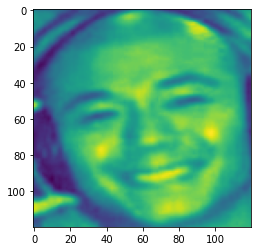

In [63]:
plt.imshow(X[3])

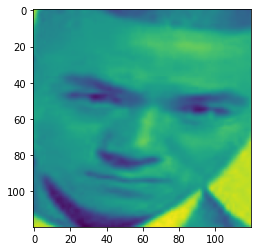

In [64]:
plt.imshow(X[8])

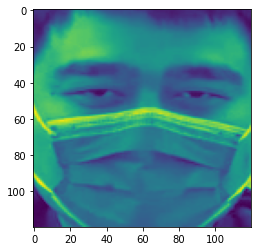

In [65]:
plt.imshow(data[900][0])

In [66]:
X.shape

(1000, 120, 120)

In [67]:
Y.shape

(1000,)

In [68]:
X1=X.reshape(X.shape[0], IMG_SIZE,IMG_SIZE,1)
X1.shape

(1000, 120, 120, 1)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D


model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=X1.shape[1:]))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 118, 118, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)            

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y,stratify=Y,random_state=0,test_size=0.1)


In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
callbacks=EarlyStopping(patience=4,monitor="val_accuracy")

In [74]:
history=model.fit(x_train,y_train,epochs=13,validation_split=0.2)

Train on 720 samples, validate on 180 samples
Epoch 1/13
720/720 [==============================] - 11s 15ms/sample - loss: 0.6540 - accuracy: 0.6139 - val_loss: 0.5083 - val_accuracy: 0.7667
Epoch 2/13
720/720 [==============================] - 10s 14ms/sample - loss: 0.3681 - accuracy: 0.8361 - val_loss: 0.2805 - val_accuracy: 0.8833
Epoch 3/13
720/720 [==============================] - 10s 14ms/sample - loss: 0.1952 - accuracy: 0.9167 - val_loss: 0.3238 - val_accuracy: 0.8611
Epoch 4/13
720/720 [==============================] - 10s 14ms/sample - loss: 0.2702 - accuracy: 0.8833 - val_loss: 0.2299 - val_accuracy: 0.9000
Epoch 5/13
720/720 [==============================] - 10s 14ms/sample - loss: 0.1416 - accuracy: 0.9486 - val_loss: 0.2043 - val_accuracy: 0.9278
Epoch 6/13
720/720 [==============================] - 10s 14ms/sample - loss: 0.1099 - accuracy: 0.9528 - val_loss: 0.2029 - val_accuracy: 0.9333
Epoch 7/13
720/720 [==============================] - 10s 13ms/sample - loss: 

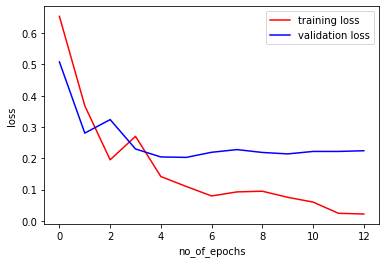

In [79]:
plt.plot(history.history['loss'],'red',label='training loss')
plt.plot(history.history['val_loss'],'blue',label='validation loss')
plt.xlabel('no_of_epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

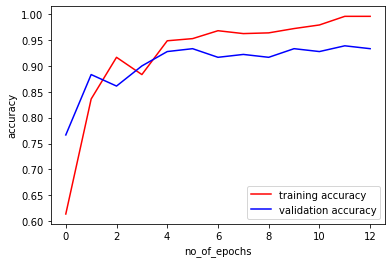

In [82]:
plt.plot(history.history['accuracy'],'red',label='training accuracy')
plt.plot(history.history['val_accuracy'],'blue',label='validation accuracy')
plt.xlabel('no_of_epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [83]:
model.evaluate(x_test,y_test)

100/100 [==============================] - 1s 6ms/sample - loss: 0.1191 - accuracy: 0.9500


[0.11907851102063433, 0.95]

In [84]:
from tensorflow.keras.models import load_model 
model.save(r"C:\Users\Aniruddh Srivatsa\Downloads\masked.h5") 
loaded_model = load_model(r"C:\Users\Aniruddh Srivatsa\Downloads\masked.h5") 
loss, accuracy = loaded_model.evaluate(x_test,y_test) 
print(loss,accuracy)

100/100 [==============================] - 1s 10ms/sample - loss: 0.1191 - accuracy: 0.9500
0.11907851102063433 0.95


In [85]:
import cv2
import numpy as np

In [86]:
loaded_model = load_model(r"C:\Users\Aniruddh Srivatsa\Downloads\masked.h5") 

In [87]:
face_crosser = cv2.CascadeClassifier(r"C:\Users\Aniruddh Srivatsa\Documents\haarcascade_frontalface_default.xml")



labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [88]:
print(face_crosser)

<CascadeClassifier 000002D42EDC0BF0>


In [89]:
original=cv2.VideoCapture(0)
while(True):

    ret,img=original.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    facult=face_crosser.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in facult:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(120,120))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,120,120,1))
        result=loaded_model.predict(reshaped)
        
        label=np.argmax(result)
        results=result[0][np.argmax(result)]
        
        print("actual: ",label,"probability: ", results)
        labeled = "{}: {:.2f}%".format(label,results*100)
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        cv2.putText(img, labeled, (x, y-48),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('Pred',img)
    
    
    if cv2.waitKey(1) & 0xff==ord("q"):
        break
    

cv2.destroyAllWindows()
original.release()

actual:  1 probability:  0.5016832
actual:  0 probability:  0.89373654
actual:  0 probability:  0.7530581
actual:  0 probability:  0.8212103
actual:  0 probability:  0.7847249
actual:  0 probability:  0.7750527
actual:  0 probability:  0.87007225
actual:  0 probability:  0.8856543
actual:  0 probability:  0.9964658
actual:  0 probability:  0.9948519
actual:  0 probability:  0.9964683
actual:  0 probability:  0.9977775
actual:  0 probability:  0.997291
actual:  0 probability:  0.99859995
actual:  0 probability:  0.9989411
actual:  0 probability:  0.99941576
actual:  0 probability:  0.99958926
actual:  0 probability:  0.9963935
actual:  0 probability:  0.85766476
actual:  0 probability:  0.96082
actual:  0 probability:  0.958392
actual:  0 probability:  0.91860634
actual:  0 probability:  0.9353859
actual:  0 probability:  0.6399345
actual:  0 probability:  0.8801474
actual:  0 probability:  0.7854177
actual:  0 probability:  0.8361764
actual:  0 probability:  0.90654063
actual:  0 proba